# College Food Choices Survey

## Jessica Stapleton, Evan Russell, Matthew Cuneo

Diet has been documented as having an impact on the mental health of individuals including college students. The perception of college students is a care free attitude when selecting their diet. This analysis of a survey of Mercyhurst University students dietary habits will examine if the diets of their childhood guided their current diet, grades, current diet, and outlook on life.

The analysis will conducted by calculating a health score based on survey results per students then plotting the scores against life attitude and family history.

## Motivation

Jessica works for a full-service survey and market research company. Her company communicates with the client what questions they want covered, and then goes out into field, collects survey responses, and weights the data to send back to the client. Her role mostly consists of weighting data after it has already been cleaned. Our group wanted to explore a survey of raw data had to be analyzed? How would we approach that, and what information can be gathered?

## Background

Overall wealthness of an individual has been shown through various studies to be associated with the quality of exercise and diet. Universities and colleges often provide recommendations to their student body for ways to maintain a healthy diet, exercise, and reduce stress. For example, Rutgers university has a list of 101 health and wellness tips published on their website that includes recommends like limiting junk food, eating fruits and veggies, and drinking water (Rutgers). Studies of Chilean college and Iranian medical students found that eating fruits and vegetables daily resulted in higher levels of happiness (Piqueras, et al 2011 and Lesani, Mohammadpoorasl 2016).

Other studies have found that students who consume a diet high in fruits, vegetables, and lean proteins tend to have better academic performance and higher levels of happiness than those who consume a diet high in processed foods (El Ansari et al, 2014). Similarly, two other studies by Rampersaud et al(2005) and Reuter et al (2020) revealed that eating breakfast/balanced meals regularly is associated with higher GPAs and overall academic achievement, as well as increased feelings of happiness and well-being. In exploring this linkage further, our study looks to further inspect the relationship between food/eating habits and GPA and physical/emotional well-being


### Citations
1. Piqueras, et al 2011 - https://www.researchgate.net/publication/296475425_Eating_breakfast_fruit_and_vegetable_intake_and_their_relation_with_happiness_in_college_students
1. Rutgers - https://wellnesscenter.camden.rutgers.edu/101-health-and-wellness-tips-for-college-students/
1. El Ansari, et al 2014 - https://pubmed.ncbi.nlm.nih.gov/25230537/
1. Rampersaud, et al 2005 - https://pubmed.ncbi.nlm.nih.gov/15883552/
1. Reuter, et al 2020 - https://www.fgcu.edu/mariebcollege/rehabilitationsciences/files/the_influence_of_eating_habits_on_the_academic_performance_of_university_students_2020.pdf

## Dataset
A survey of 125 Mercyhurst University students was conducted and is available on kaggle.com (https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv). The survey asked 125 students 60 questions about their childhood diet history, current diet, GPA, attitude about life, and various other items. The hosted dataset includes a text file that describes each of the questions and any domain applied to the expected answers. 

This data is raw, uncleaned data from a survey of college students. There are many opportunities for data cleaning in this set, including imputing missing/none cases, standardizing open text responses, and taking out columns we won't be doing analysis on. 

Some of the columns that we expect to use in the analysis contain data type errors such as text instead of numeric. These records will need to be addressed with code to determine if a numeric substring exists and is within the distrubition of the other values.

There are multiple responses where text responses were given to numeric questions; the last question asking weight has responses like "I don't want to answer", nan, or lists unit for lbs. Likewise, throughout the data, nan, nun, and None are all used synonymously for failure to collect responses or missing entries.


### Methods

The datasets contains several data type and formatting issues. Prior to any analysis the dataset must be cleaned by addressing issues such as a string entered for GPA, standardizing free text for multiple questions, and applying a generalization of their attitude about healthy diet selections.

A cleaned dataset will contain several parameters about diet choice that will be considered predictors and life wealthness parameters which will be the response variables.

#### Response Cleaning

Three metrics of life wealthness are included in the dataset: GPA, weight, and opinion if life is rewarding.

- _GPA_
    - Question: numerical, actual GPA
    - Expected values: 0 to 4
    - Issue: numerical and text values
    
    
- _weight_
    - Question: what is your weight in pounds?
    - Expected values: 0 < values
    - Issues: numerical and text values
    
    
- _life_rewarding_
    - Question: how likely are you to agree with the following statement: “I feel life is very rewarding!” ?
    - Expected values: 1 (strongly agree) to 10 (strongly disagree)
    - Issues: NaN values

Begin data cleaning by importing the dataset.

In [24]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly

In [25]:
df = pd.read_csv('food_coded.csv')
df.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9,...,1,1165.0,345,car racing,5,1,1315,187,NaN,NaN
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,2,725.0,690,Basketball,4,2,900,155,NaN,NaN
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,...,5,1165.0,500,none,5,1,900,I'm not answering this.,NaN,NaN
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,5,725.0,690,NaN,3,1,1315,"Not sure, 240",NaN,NaN
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,4,940.0,500,Softball,4,2,760,190,NaN,NaN
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4,...,4,940.0,345,None.,1,2,1315,190,NaN,NaN
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",`,...,5,940.0,690,soccer,4,1,1315,180,NaN,NaN
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1,...,1,725.0,500,none,4,2,1315,137,NaN,NaN
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2,...,5,725.0,345,none,3,2,760,180,NaN,NaN
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1,...,4,580.0,345,field hockey,5,1,900,125,NaN,NaN


#### GPA Cleaning

The mix of data type will be handled by using a regular expression to locate the numerical values if present and convert to float. If a value cannot be found, NaN will be used.

In [26]:
#print(f'GPA type: {df["GPA"].dtypes}')
def check_decimal(x):
    try:
        float(x)
        return True
    except:
        return False
#display(df.loc[~df['GPA'].apply(check_decimal) | df['GPA'].isna()])

# Find either decimal or numeric values. The decimal must be examined first because a decimal could incorrectly be considered a numeric.
df['GPA'] = df['GPA'].str.extract("(\d+\.\d+|\d*)")
# Replace blank values with NaN
df['GPA'] = df['GPA'].replace('^\s*$',np.nan,regex=True)
df['GPA'] = pd.to_numeric(df['GPA'])

#Removing NaN values
df = df[df['GPA'].notna()]


#### Weight Cleaning

The mix of data type will be handled by using a regular expression to locate the numerical values if present and convert to float. If a value cannot be found, NaN will be used.

In [27]:
#Removing str from cells
df['weight']=df['weight'].astype(str)
df['weight'] = df['weight'].str.extract('(\d+)', expand=False)


#Removing NaN values
df["weight"] = pd.to_numeric(df["weight"], errors="ignore")
df = df[df['weight'].notna()]

#### Life_rewarding Cleaning

Drop NaN values.

In [28]:
#Life Rewarding column was far less cumbersome and I just needed to drop NaN values
df["life_rewarding"] = pd.to_numeric(df["life_rewarding"], errors="ignore")
df = df[df['life_rewarding'].notna()]

#### Predictor Cleaning

A collection of questions asked respondents to describe their dietary choices in a free text field. This approach resulted in a wide variety of answers, words, and formatting. The cleaning of these responses was completed by applying a function to each field and count the number of words associate with key food categories. After running the function a set of new columns are added to the data frame titled with the source column and food categories. The new columns contain a count of number of words enter in the answer to the question and associated with the category.

The function was applied to:

- _comfort_food_
    - definition: List 3-5 comfort foods that come to mind
    - issue: survey allowed for free text which resulted in a wide variety of values
- _food_childhood_
    - definition: what was your favorite childhood food?
    - issue: survey allowed for free text which resulted in a wide variety of values
- _healthy_meal_
    - definition: what is a healthy meal? Describe in 2-3 sentences.
    - issue: survey allowed for free text which resulted in a wide variety of values
- _ideal_diet_
    - definition: describe your ideal diet in 2-3 sentences
    - issue: survey allowed for free text which resulted in a wide variety of values



#### Function to count words in each food category

The function recieves a data frame, column name, dictionary of categories, and dictionary of stopwords. It processing the target column of the data frame by tokenizing the words and comparing them to the dictionary values. Stopwords are ignored and if a word matches a categories value then that category count increases by one for each matching word. The categories and stopword values were constructed by iterating over the columns and assign unclassified words into an appropriate category.

In [29]:
# Create a function that can process each free text column that contains a list of foods

def food_count(dfIn, column, categories, stopwords):
    # Stopwords based on review of text values

    
    # Empty set to collect clean food words
    clean_food = set()
    
    # Iterate through the column to identify the clean words
    for value in dfIn[column].str.lower():
        try:
            words = nltk.word_tokenize(value)
            #going thru each tokenized phrase
            for w in words:
                if w not in stopwords:
                    
                    #getting a clean list of foods
                    clean_food.add(w)    
        except:
            continue # Ignore NaN value
    print(f'\tKeywords identified: {len(clean_food)}\n{clean_food}')
    
    
    # Create new columns for each of the categories with a prefix of the source column
    for cat in categories:
        df[column + '_fc_' + cat] = 0 #stands for food_childhood_fooditem
    df[column + '_fc_other'] = 0
    df[column + '_fc_otherValues'] = ''
        
    #converting values from the column into new category columns depending on value
    #same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
    for index, row in df.iterrows():
        try:
            # tokenize the column text, remove stopwords, add a value to targect column if a keyword is found
            words = nltk.word_tokenize(row[column].lower())
            words = [w for w in words if w not in stopwords]
            for word in words:
                    catAssinged = False
                    for cat in categories:
                        if word in categories[cat]:
                            df.at[index, column + '_fc_' + cat] += 1
                            catAssigned = True
                            
                            # Remove the word from the clean_food set
                            try:
                                clean_food.remove(word)
                            except:
                                continue
                                
                        # Break loop if the word has been assigned to a category
                        if catAssinged: break

                    if not catAssinged:
                        df.at[index, column + '_fc_other'] += 1
                        df.at[index, column+'_fc_otherValues'] = df.at[index, column+'_fc_otherValues'] + "," + word
        #except KeyError:
        #    continue
        except AttributeError:
            # Error thrown by NaN values, ignore row
            continue 
    
    df[column+'_fc_otherValues'] = df[column+'_fc_otherValues'].str[1:]
    
    print(f'\n\n\tKeywords not counted: {len(clean_food)}\n{clean_food}')

In [30]:
# Enter parameters to create new columns from the target existing ones
stopwords = ['every', 'wings', 'such', 'me', "n't", 'mashed', 'a', 'feel', 'cheesy', 'day', 'out', 'cook',
            'orange', "'s", 'little', 'of', 'my', 'one', 'way', 'current', 'so', '(', 'is', 'parmigiana',
            'food', 'would', 'cheesey', 'cherry', 'homemade', 'less', 'parmesan', 'grilled', 'are', 'rolls',
            'very', '3', 'scalloped', 'lunch', 'than', '.', 'much', 'now', 'home', 'butter', 'i', 'the', 'fry',
            'eat', '&', 'fingers', 'nuggets', 'diet', 'lots', 'wellhigh', 'enough', 'good', 'breakfast', 'be',
            'dad', 'with', 'dinner', 'fried', 'lot', 'time', 'at', 'alfredo', 'meals', 'what', 'tenders', 'that',
            'in', 'cob', 'breaded', 'add', 'garlic', '/', ',', 'more', 'consume', 'eating', 'only', 'parm', 'able',
            'as', 'foods', 'for', ')', 'n', 'meal', 'no', 'back', 'on', 'same', 'get', 'cooked', 'not', 'have',
            '-', 'also', 'none', 'to', 'do', 'but', 'it', 'low', 'or', 'ideally', 'want', 'intake', 'buttered',    
            'especially', 'blend', 'distribute', 'wholesome', 'kids', 'pretty', 'variety', 'go', 'energy',
            'will', 'bars', 'times', 'when', 'hard', 'opposed', 'fast','bad', 'being', 'was', '2-3', 'excessive', 'based',
            'lean', 'light', 'salt', 'make', 'weight', 'cutting', 'completely', 'an', 'groups', 'once', 'eventually',
            'fourth', 'own', 'portions', 'avoid', 'other', 'along', 'least', 'concrete', 'had', 'without', 'you', 'just',
            'here', 'going', 'involves', 'still', 'heavy', 'mexican', 'days', 'lifestyle', ';', 'store', 'difficult', 'mom',
            'this', '1500-2000', 'multiple', 'mix', 'money', 'everyday', 'try', 'should', 'absence', 'better', 'requirement',
            'body', 'between', 'delete', 'genetically', 'best', 'replenish', 'substitute', 'most', 'while', 'strength',
            'high', 'which', 'throughout', 'consists', 'mainly', 'nicer', 'gratification', 'above', 'cooking', 'rainbow',
            'highly', 'its', 'enhanced', 'currently', 'categories', 'intaking', 'incorporating', 'there', 'budget', 'from',
            'sustainance', '5-6', 'down', 'group', 'getting', 'delicious', 'about', 'though', 'proportion', 'including', 'need',
            'include', 'properly', 'consistently', 'likely', 'needs', 'although', 'wo', 'close', 'if', 'always', 'doesnt', 'spend',
            'those', 'enjoy', 'ate', 'goal', 'aim', 'then', 'buy', 'because', 'hope', 'flavors', 'filled', 'instant', 'important',
            'considering', 'proper', 'alternatives', 'ideals', 'products', 'portioned', 'order', 'sources', 'incorporate', 'something',
            'complete', 'by', 'consisting', 'continue', "''", 'hours', 'crave', 'daily', 'sticking', 'give', 'consist', 'sourced', 'wish']

categoriesDict = {'meat' : ['chicken', 'wing','protein','protien','proteins', 'hamburger', 'beef',
                            'chicken','meat','meats','red', 'burgers','white', 'meatball', 'hamburgers', 'burger'
                            'eggs','steak', 'turkey', 'egg', 'burgers', 'cheeseburgers', 'omelet','eggs','burritos',
                            'chilli','nuggs','deli','tikka','sausage', 'meatballs', 'stroganof','burger', 'dumplings',
                            'stroganoff','dogs', 'stromboli','tacos','roast', 'hamloaf', 'ham', 'schnitzle', 'stew',
                            'meatloaf', 'dogs', 'deer'],
                  
                  'seafood' : ['tuna', 'seafood', 'sushi', 'fish', 'salmon','saltfish','shrimp', 'crab'],
                  
                  'meatless-protein' : ['quinoa', 'almonds', 'peanut','nut', 'nuts', 'beans'],
                  
                  'fruit' : ['fruits','fruit','veggies/fruits', 'watermelon', 'grapes', 'plantain', 'banana',
                             'raspberry', 'cranberries', 'apple', 'fruits/veges','plaintain', 'plantains'],
                  
                  'veggie' : ['salad','plant','plant-based', 'veggie', 'vegetables', 'vegetable', 'broccoli', 'peppers',
                              'vegtables', 'pepper', 'salsa', 'cucumber',  'potato', 'potatoes', 'carrots', 'squash', 'tomato',
                              'vegitibles', 'vegs', 'veggies', 'veg', 'tomatoes', 'corn', 'zucchini', 'greens', 'vegetabls',
                              'asparagus', 'fruits/veges','soup','seaweed','tomatoes', 'corn','celery', 'mushroom', 'pickles',
                              'soup'],
                  
                  'carbs' : ['mac', 'macaroni', 'pizza', 'pizza/','pasta', 'spaghetti', 'pierogies',
                             'lasagna', 'noodles', 'tortellini', 'noodle','carbs','carbohydrates',
                             'pasta','toast','breads','sandwich','breads','wheat', 'pretzels', 'pretzals',
                             'rice', 'lasagne', 'mac-n-cheese', 'bread', 'naan', 'carb', 'carbohydrate',
                             'bagels', 'dough', 'cornbread', 'bread/crackers', 'pancakes', 'cereal', 'starch', 'breads.i',
                             'grain', 'pita', 'bread/potatoes','chex', 'subs', 'sandwhich','sub','perogies', 'biryani',' waffles', 'panini', 'biscuits',
                             'pita', 'ugali', 'casserole', 'manacotti','waffles'],
                  
                  'junk' : ['processed','sugar','sweets','fat','junk','desserts','dessert','deserts',
                            'unhealthy','snacking','snack','snacks','snack/junk','greasy,','artificial',
                            'sugars','food/desserts','candy','fried', 'brownie', 'chocolate', 'pepsi', 'candy',
                            'mcdonalds', 'donuts', 'cake', 'cookie', 'chocolates', 'jerky', 'milkshakes', 'desserts',
                            'ice-cream', 'icecream', 'cookies', 'frosted', 'cheez-its', 'fries', 'twizzlers', 'pie', 'fires',
                            'macroons', 'macaroons', 'chex-mix', 'desserts' 'cream/milkshake', 'ritz', 'reese', 'dessets',
                            'nutella', 'brownies', 'ranch', 'cheesecake','sweet', 'sweat', 'shakes', 'chips', 'sugary','soda',
                            'pop','chips','coffee', 'doughnuts','doritos', 'cream/milkshake','fritos','pop-tarts','tiramisu',
                            'tarts', 'popcorn',  'dip'],
                  
                  'healthy_tw' : ['healthy','fresh','organic','healthier','balanced','balance','organic/healthy','health',
                                  'refined','nutritious','nutrients', 'vegetarian', 'smoothies', 'vegan', 'natural', 'leaner',
                                  'fiber'],
                  
                  'water' : ['water','hydration','drink'],
                  
                  'dairy' : ['mozzarella', 'yogurt', 'cottage', 'cream', 'cheese', 'milk', 'dairy','quesadilla', 'quesadillas']
                  }





In [31]:
# Create new comfort_food columns for the target collection of foods
print('comfort_food')
food_count(df, 'comfort_food', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new food_childhood columns for the target collection of foods
print('food_childhood')
food_count(df, 'food_childhood', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new healthy_meal columns for the target collection of foods
print('healthy_meal')
food_count(df, 'healthy_meal', categoriesDict, stopwords)

print('\n\n\n\n')
# Create new healthy_meal columns for the target collection of foods
print('ideal_diet')
food_count(df, 'ideal_diet', categoriesDict, stopwords)

comfort_food
	Keywords identified: 147
{'masala', 'cheese', 'sweets', 'cookie', 'dr.', 'fires', 'tuna', 'coffee', 'squash', 'beef', 'donuts', 'broccoli', 'debbie', 'chips', 'cream', 'nutella', 'terra', 'cottage', 'brownie', 'pretzels', 'dessets', 'almonds', 'bagels', 'nuggs', 'ice-cream', 'capps', 'candy', 'chocolates', 'anything', 'cornbread', 'bread', 'sticks', 'jims', 'protein', 'potato', 'naan', 'chex-mix', 'toast', 'burgers', 'pie', 'cookies', 'ranch', 'popcorn', 'kinds', 'rice', 'watermelon', 'mac-n-cheese', 'pop', 'pancakes', 'chocolate', 'fritos', 'slim', 'egg', 'mac', 'crea', 'dip', 'deli', 'korean', 'steak', 'ritz', 'dishes', 'moe', 'doughnuts', 'peanut', 'snacks', 'omelet', 'fruit', 'chilli', 'grandma', 'wegmans', 'burger', 'subs', 'indian', 'lasagne', 'wine', 'potatoes', 'cheesecake', 'dark', 'cucumber', 'chinese', 'noodle', 'macaroni', 'plantain', 'microwaveable', 'french', 'frosted', 'hamburgers', 'saltfish', 'pot', 'pepper', 'peppers', 'kit', 'vinegar', 'salsa', 'seaweed

Five questions of the survey asked the respondants to select one of two options that they associate with a food related term. A heathiness score will be calculated based on how the select of five questions. A zero will be assigned if the respondant selected the healthy option and a one if the unhealthy option was selected. The healthiness score will be calculated as the sum of the five assigned values. The range of the scores will be from 0 to 5 where lower scores will be considered the healthiest. 

The specific surveys questions are:

- _breakfast_ 
    - question: (the participants are shown the following pictures and asked which one of these pictures they associate with the word "breakfast")
        - 1 - cereal option (healthy option)
           
            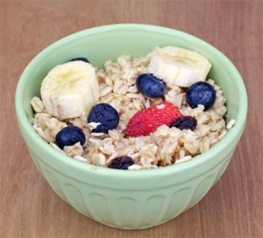
        - 2 - donut option 
         
            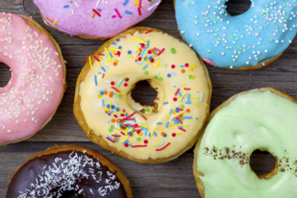
- _coffee_
    - question: which of the two pictures you associate with the word coffee?
        - 1 - creamy frapuccino 

            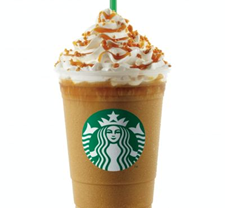
        - 2 - espresso shown (healthy option)
                 
            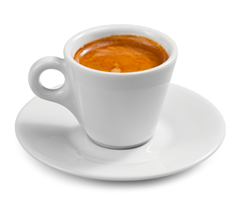
- _drink_
    - question: which picture do you associate with the word “drink”?
        - 1 - orange juice
        
            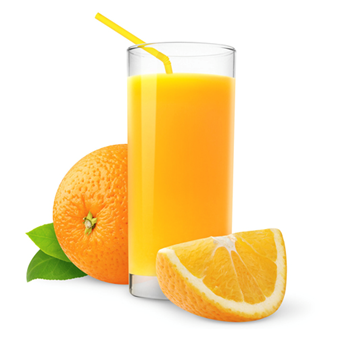
        - 2 - soda
        
            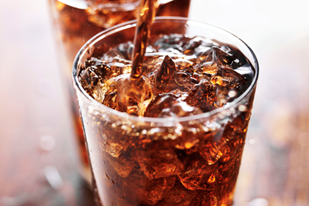
            
- _fries_
    - question: which of these pictures you associate with word fries? 
        - 1 - Mcdonald's fries
        
            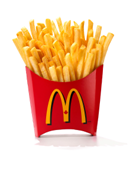
        - 2 - home fries
        
            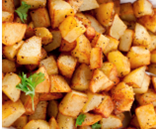
            
- _soup_
    - question: Which of the two pictures you associate with the word soup?
        - 1 - veggie soup
        
            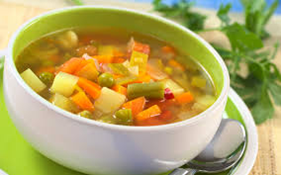
        - 2 - creamy soup
        
            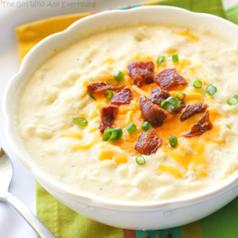

In [32]:
#calculate healthiness score - low score for healthest options (new feature)

#breakfast = 1 (Cereal), 2 (donuts). 1 = healthy (H), 2 = unhealthy (UH)
#coffee = 1 (creamy frapuccino), 2 (espresso). 1 = UH, 2 = H
#drink = 1 (orange juice), 2 (soda). 1 = H, 2 = UH
#fries = 1 (McDonalds fries), 2 (home fries). 1 = UH, 2 = H
#soup = 1 (vegetable soup), 2 (creamy soup). 1 = H, 2 = UH

#checking column types
df.dtypes


#recoding columns - 0 is healthier option, 1 is unhealthier option
df['rbreakfast'] = [0 if x == 1 else 1 for x in df['breakfast']]
df['rcoffee'] = [0 if x == 2 else 1 for x in df['coffee']]
df['rdrink'] = [0 if x == 1 else 1 for x in df['drink']]
df['rfries'] = [0 if x == 2 else 1 for x in df['fries']]
df['rsoup'] = [0 if x == 1 else 1 for x in df['soup']]
df.head(20)

#total healthiness score 
df['healthiness_score'] = df['rbreakfast'] + df['rcoffee'] + df['rdrink'] + df['rfries'] + df['rsoup']
df.head(20)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,ideal_diet_fc_water,ideal_diet_fc_dairy,ideal_diet_fc_other,ideal_diet_fc_otherValues,rbreakfast,rcoffee,rdrink,rfries,rsoup,healthiness_score
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9,...,0,0,1,healthy,0,1,0,0,0,1
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,...,0,1,8,"small,trying,carbs,protein,fruits,veggies,and,...",0,0,1,1,0,2
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,...,0,0,4,"healthy,fresh,veggies/fruits,organic",0,0,1,0,0,1
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,...,0,0,3,"like,healthier,loose",0,0,1,1,0,2
5,2.250,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4,...,0,0,2,"ideal,healthy",0,0,1,1,0,2
6,3.800,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",`,...,0,0,8,"like,fresh,fruits,and,vegetables,however,all,f...",0,0,0,1,0,1
7,3.300,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1,...,0,0,9,"ideal,fruit,and,chicken,really,eggs,any,type,t...",0,1,1,1,0,3
8,3.300,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2,...,0,0,0,,0,1,0,1,1,3
9,3.300,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1,...,0,0,6,"protein,carbs,and,fruits,and,veggies",0,0,0,1,0,1
10,3.500,1,1,610,3.0,980.0,2,"Pasta, grandma homemade chocolate cake anythin...",Boredom,2,...,0,0,2,"chicken,fish",0,0,1,1,0,2


The healthines_score scale ran from 0 to 5, where 0 is the healthiest score and 5 is the unhealhiness score for participants choosing the betwen 2 options.

## Visualizations

The first visualization is a pair plot of the three existing response variables plus the healthiness score.

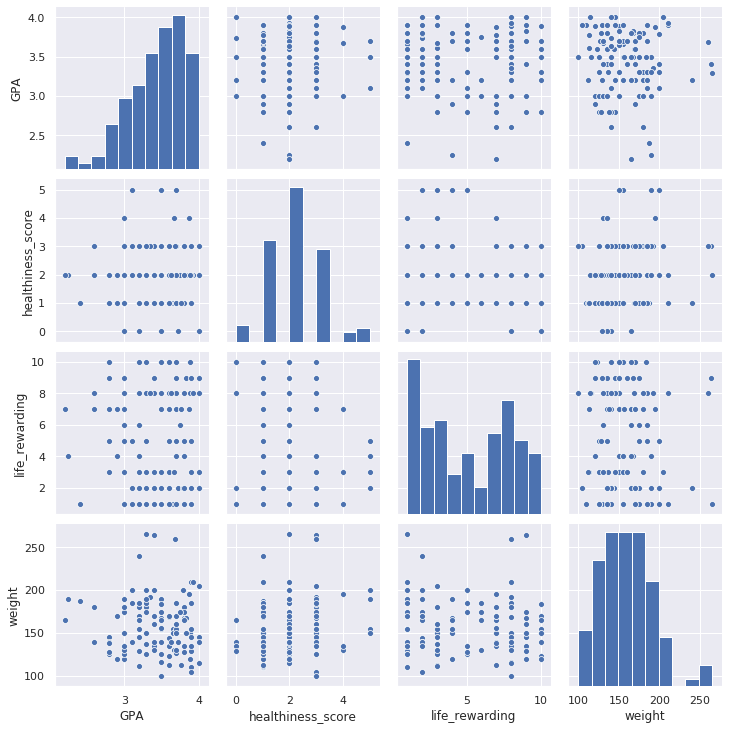

In [33]:
sns.pairplot(df.filter(['GPA','healthiness_score','life_rewarding', 'weight']))

The pair plot does not display any clear groupings or correlations. The healthiness score histogram contains two gaps but they are just a rendering artifact. The GPA appears to be left skewed and the life_rewarding may be bimodal. Since some of the variables are discrete numerical values, the scatter plots appear grid-like.

Next we plotted a heatmap of the correlation between a collection of 7 numerical variables.

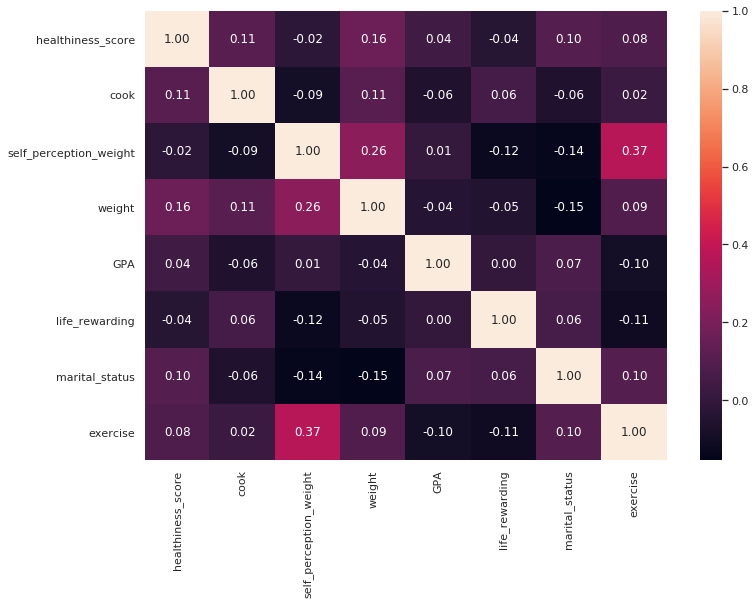

In [34]:
df2 = df[['healthiness_score', 'cook', 'self_perception_weight', 'weight', 'GPA', 'life_rewarding', 'marital_status', 'exercise']].copy()

sns.heatmap(df2.corr(), annot=True, fmt='0.2f')


We do not see any high correlation between any of the 7 variables listed. There is slight correlation between self_perception_weight/exercise and self_preception_weight/weight. This makes sense to us, though we are surprised that more variables are not significantly correlated. 

dad_edu_grad          -0.286971
mom_edu_hsdropout     -0.177751
dad_edu_hsdropout     -0.094097
single                -0.080116
eating_out            -0.069257
Gender                -0.047330
mom_edu_grad          -0.041743
weight                -0.041165
mom_edu_colldropout   -0.004917
mom_edu_colldeg        0.000761
life_rewarding         0.002466
healthiness_score      0.042224
dad_edu_hsdeg          0.051622
relationship           0.068169
dad_edu_colldropout    0.100846
mom_edu_hsdeg          0.154434
dad_edu_colldeg        0.176583
Name: GPA, dtype: float64


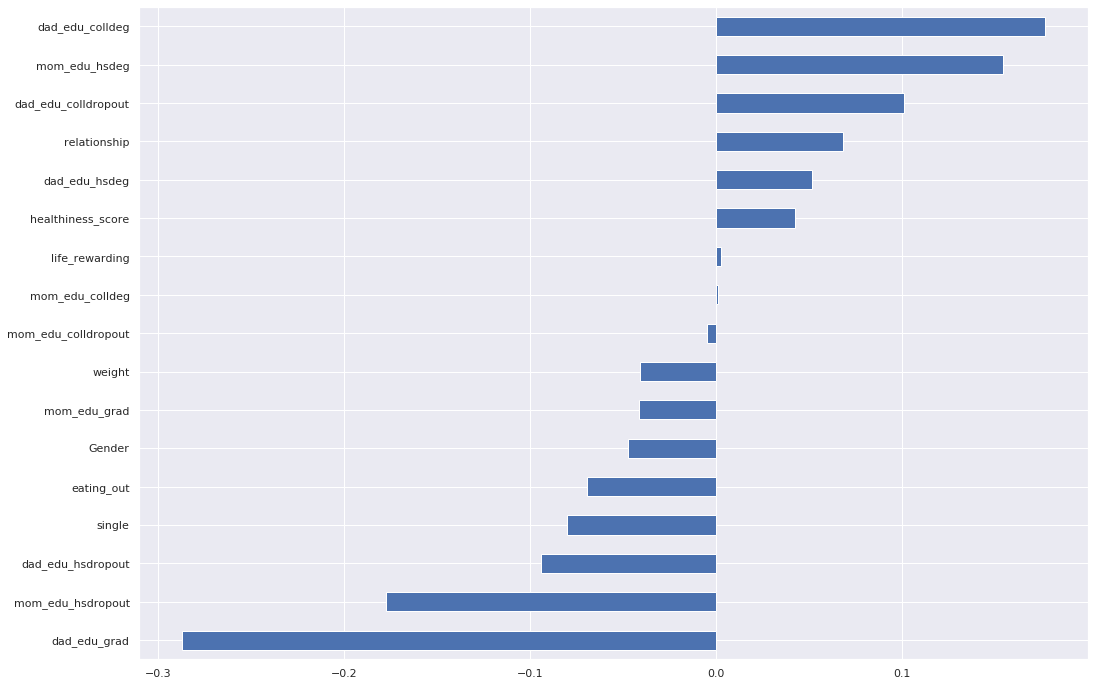

In [35]:
#import matplotlib.colors as mcolors
data=df[['GPA','Gender','eating_out','healthiness_score','life_rewarding','weight','mother_education','father_education', 'marital_status']]
data=pd.get_dummies(data, columns=['mother_education','father_education', 'marital_status'])

dict = {'father_education_5.0': 'dad_edu_grad',
        'father_education_4.0': 'dad_edu_colldeg',
        'father_education_3.0': 'dad_edu_colldropout',
        'father_education_2.0': 'dad_edu_hsdeg',
        'father_education_1.0': 'dad_edu_hsdropout',
        'mother_education_5.0': 'mom_edu_grad',
        'mother_education_4.0': 'mom_edu_colldeg',
        'mother_education_3.0': 'mom_edu_colldropout',
        'mother_education_2.0': 'mom_edu_hsdeg',
        'mother_education_1.0': 'mom_edu_hsdropout',
        'marital_status_2.0': 'relationship',
        'marital_status_1.0': 'single',
       }

data.rename(columns=dict, inplace=True)

#print(data)
corr = data.corr(method='pearson')
# plot the correlation matrix using seaborn
#sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)

# print the correlation coefficients for each variable
GPA_corr = corr['GPA'].sort_values(kind="quicksort")
GPA_corr=GPA_corr.drop('GPA')
print(GPA_corr)
fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

GPA_corr.plot.barh()

#c.plot.barh()

The chart appears to indicate that there is a threshold of father education between 4 (college degree) and 5 (graduate degree); however that 

relationship          -0.145321
dad_edu_grad          -0.070210
life_rewarding        -0.047659
GPA                   -0.041165
mom_edu_colldeg       -0.022159
mom_edu_colldropout   -0.017452
mom_edu_hsdropout     -0.016639
mom_edu_hsdeg         -0.004857
dad_edu_colldeg        0.004398
dad_edu_colldropout    0.023949
dad_edu_hsdeg          0.024418
eating_out             0.064462
dad_edu_hsdropout      0.085638
mom_edu_grad           0.100246
healthiness_score      0.161326
single                 0.162203
Gender                 0.512048
Name: weight, dtype: float64


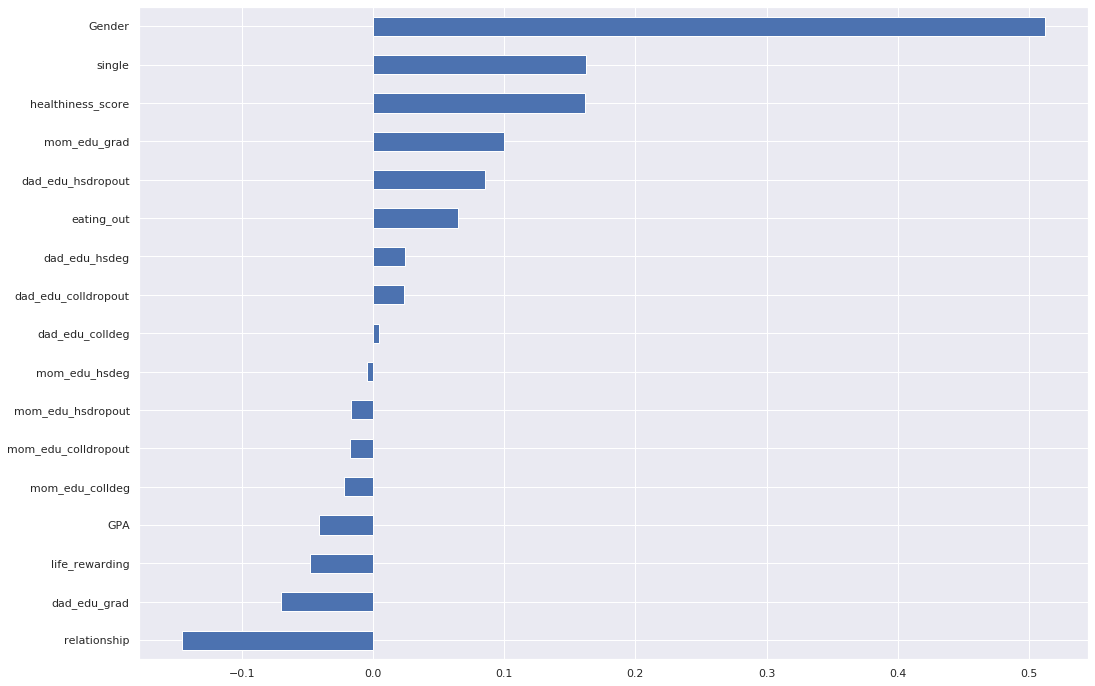

In [36]:
# print the correlation coefficients for each variable
weight_corr = corr['weight'].sort_values(kind="quicksort")
weight_corr=weight_corr.drop('weight')
print(weight_corr)
fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

weight_corr.plot.barh()

dad_edu_colldropout   -0.146258
dad_edu_hsdeg         -0.078142
mom_edu_hsdropout     -0.061450
weight                -0.047659
single                -0.046392
mom_edu_colldropout   -0.041940
healthiness_score     -0.036950
eating_out            -0.025323
dad_edu_colldeg       -0.006386
mom_edu_colldeg       -0.006272
mom_edu_hsdeg          0.001654
GPA                    0.002466
relationship           0.068281
Gender                 0.082443
dad_edu_hsdropout      0.102030
mom_edu_grad           0.130894
dad_edu_grad           0.181558
Name: life_rewarding, dtype: float64


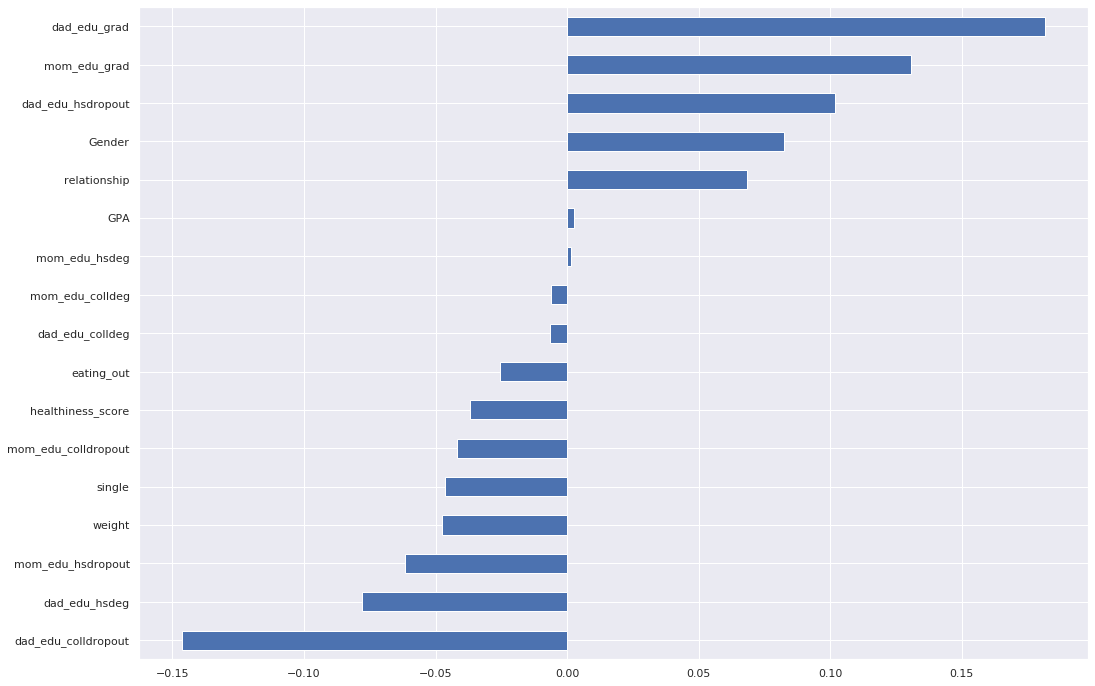

In [37]:
# print the correlation coefficients for each variable
lr_corr = corr['life_rewarding'].sort_values(kind="quicksort")
lr_corr=lr_corr.drop('life_rewarding')
print(lr_corr)
fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

lr_corr.plot.barh()

mom_edu_hsdropout     -0.098012
single                -0.091370
dad_edu_grad          -0.081216
life_rewarding        -0.036950
mom_edu_hsdeg         -0.023334
dad_edu_colldeg       -0.015263
mom_edu_colldeg       -0.014614
dad_edu_hsdeg          0.011844
GPA                    0.042224
mom_edu_grad           0.045105
dad_edu_hsdropout      0.045336
eating_out             0.051089
mom_edu_colldropout    0.053075
dad_edu_colldropout    0.067394
relationship           0.108502
Gender                 0.151721
weight                 0.161326
Name: healthiness_score, dtype: float64


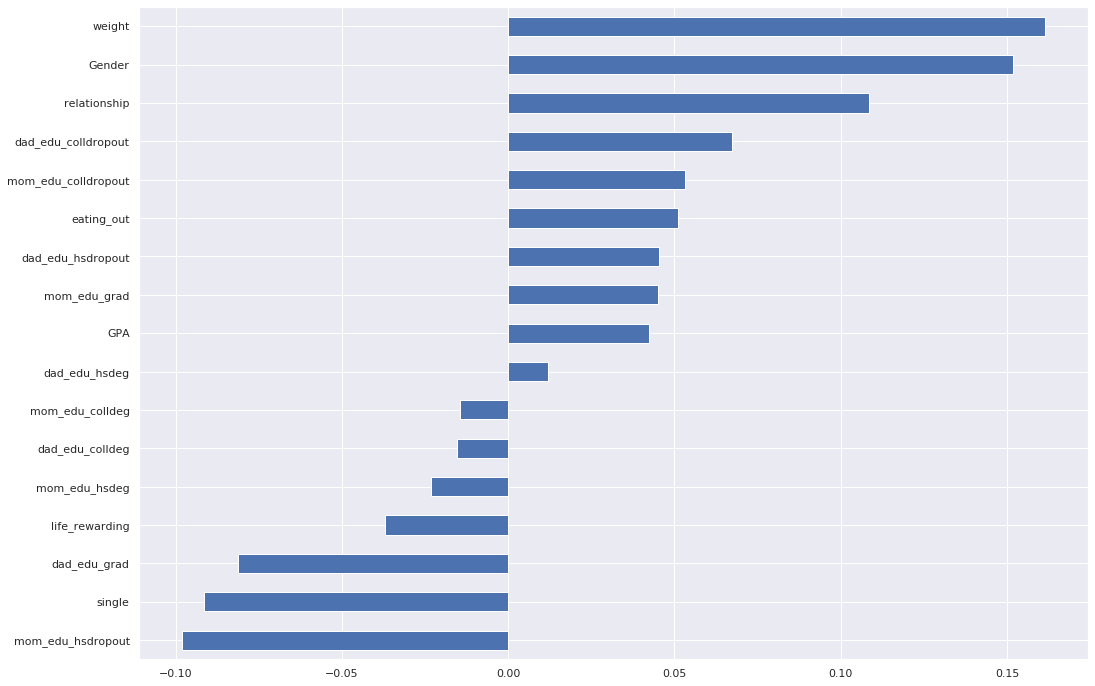

In [38]:
# print the correlation coefficients for each variable
hscore_corr = corr['healthiness_score'].sort_values(kind="quicksort")
hscore_corr=hscore_corr.drop('healthiness_score')
print(hscore_corr)
fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

hscore_corr.plot.barh()

In [39]:
for key, values in categoriesDict.items():
    
    kw = key
    df1 = pd.DataFrame(df[f'comfort_food_fc_{kw}'].loc[df[f'comfort_food_fc_{kw}']>0])
    df1['type'] = 'comfort_food'
    df1['words'] = df1[f'comfort_food_fc_{kw}']

    df2 = pd.DataFrame(df[f'food_childhood_fc_{kw}'].loc[df[f'food_childhood_fc_{kw}']>0])
    df2['type'] = 'food_childhood'
    df2['words'] = df2[f'food_childhood_fc_{kw}']

    df8 = pd.DataFrame(df[f'healthy_meal_fc_{kw}'].loc[df[f'healthy_meal_fc_{kw}']>0])
    df8['type'] = 'healthy_meal'
    df8['words'] = df8[f'healthy_meal_fc_{kw}']

    df9 = pd.DataFrame(df[f'ideal_diet_fc_{kw}'].loc[df[f'ideal_diet_fc_{kw}']>0])
    df9['type'] = 'ideal_diet'
    df9['words'] = df9[f'ideal_diet_fc_{kw}']

    df3 = pd.concat([df1,df2,df8, df9])
    df3 = df3.drop([f'comfort_food_fc_{kw}',f'food_childhood_fc_{kw}',f'healthy_meal_fc_{kw}',f'ideal_diet_fc_{kw}'], axis=1)
    df3=df3.reset_index()
    df3.head()
    #df3.sample(n=20)

    plt.figure()
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.histplot(data=df3, x='words', hue='type', multiple='dodge').set(title=f'Count of {key} keyword')
    row+=1

<ipython-input-39-5a7a1f750364>:20: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 842.4x595.44 with 0 Axes>

## Conclusion

Though this dataset contains several variables and multiple new features were created, the analysis failed to provide any new insight in to the dietary habits of college students or any of the examined response variables. If this survey was expanded to more universities and increased the number of responses there may be some meaningful insight.